In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft,ndimage
from skimage.color import rgb2gray
from skimage import data,io,transform

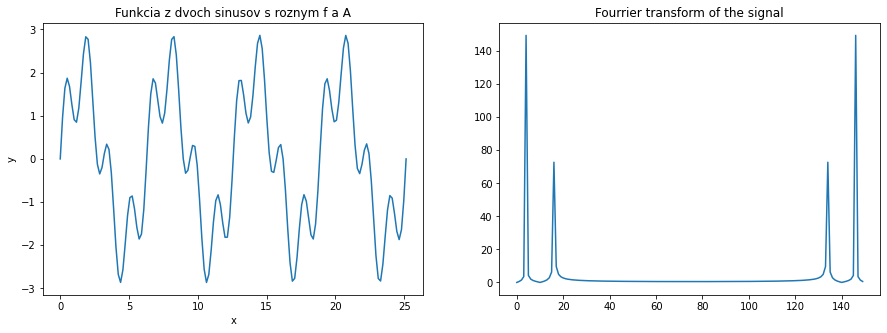

In [2]:
x = np.linspace(0, 8*np.pi, 150)
y_1 = 2*np.sin(x)
y_2 = np.sin(4*x)
y = y_1 + y_2

y_f = fft.fft(y)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcia z dvoch sinusov s roznym f a A')
plt.subplot(122)
plt.title('Fourrier transform of the signal')
plt.plot(np.abs(y_f))

/Users/miroslavuhlar/opt/anaconda3/envs/Cvicenie_5/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y')

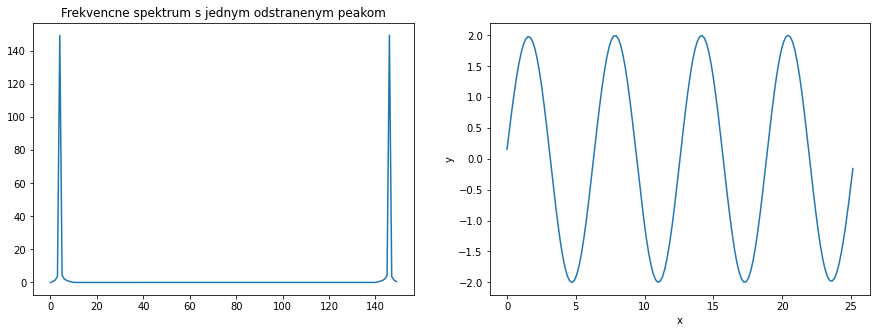

In [3]:
y_f_removed_f = y_f
y_f_removed_f[10:140] = 0  + 0.j
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.abs(y_f))
plt.title('Frekvencne spektrum s jednym odstranenym peakom')
plt.subplot(122)
y_t = fft.ifft(y_f)
plt.plot(x,y_t)
plt.xlabel('x')
plt.ylabel('y')

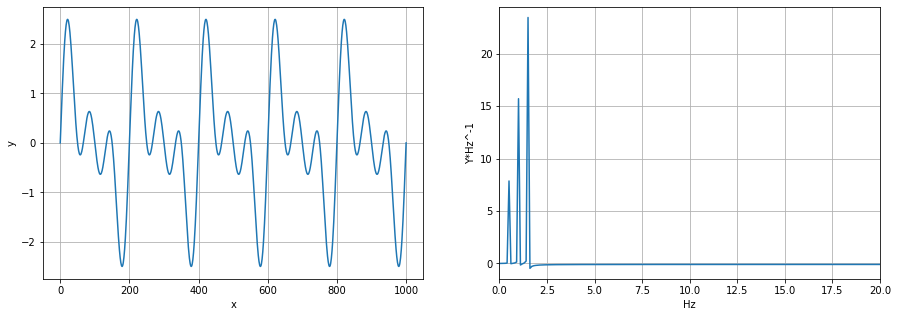

In [4]:
N = 1000
Fs  = 100 # Hz vzorkovacia frekvencia
T = N/Fs

x = np.linspace(0, 10*np.pi, N)
y_1 = np.sin(x) + np.sin(2*x) + np.sin(3*x)

f = np.linspace(0,N-1,N)*Fs/N

plt.figure(figsize=(15,5))
y_f = fft.fft(y_1)

plt.subplot(121)
plt.plot(y_1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.subplot(122)
plt.plot(f,np.real(y_f))
plt.axis([0,20,np.min(np.real(y_f))-1,np.max(np.real(y_f))+1])
plt.xlabel('Hz')
plt.ylabel('Y*Hz^-1')

plt.grid()

(35.0, 65.0, 40.0, 60.0)

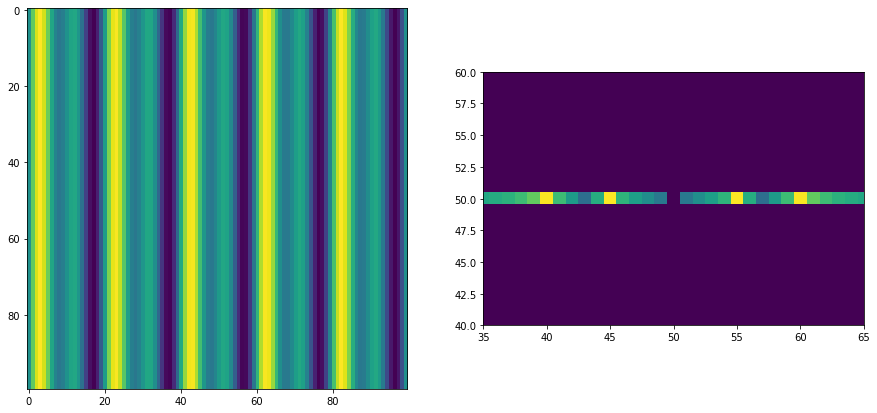

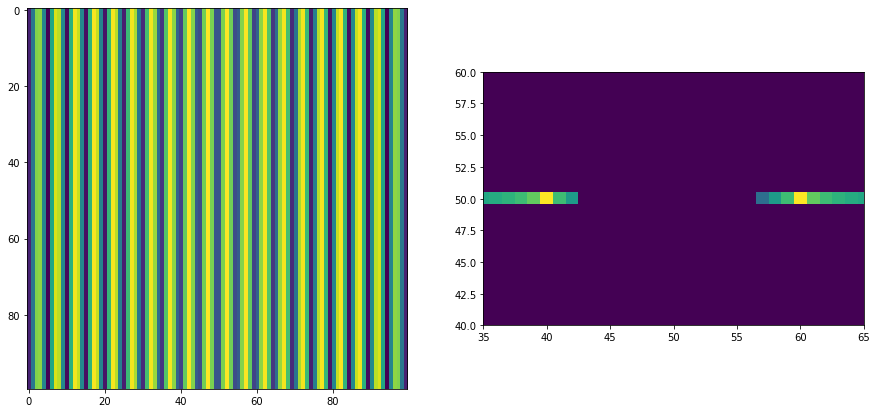

In [5]:
N=100
x = np.array([np.linspace(0,10*np.pi,N)])
y = np.sin(x)+np.sin(2*x)
im = np.repeat(y, 100,axis=0)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
im_fft= fft.fft2(im)
plt.axis([35, 65, 40, 60])
zero_center_im_fft = fft.fftshift(im_fft)


plt.imshow(np.log(1+np.abs(zero_center_im_fft)))
zero_center_im_fft[48:52,43:57]=0+0j
plt.figure(figsize=(15,10))
plt.subplot(121)
img=fft.ifft2(zero_center_im_fft)
plt.imshow(np.abs(img))
plt.subplot(122)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))
plt.axis([35, 65, 40, 60])

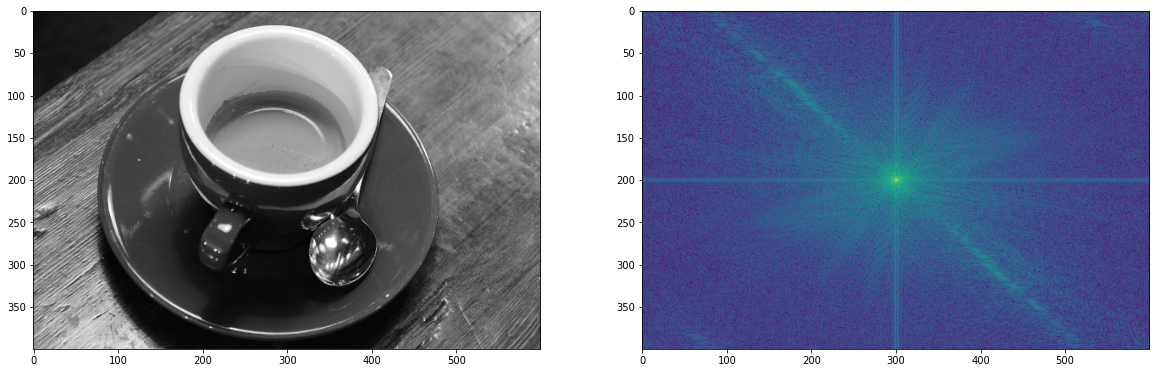

In [6]:
im = rgb2gray(data.coffee())
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))

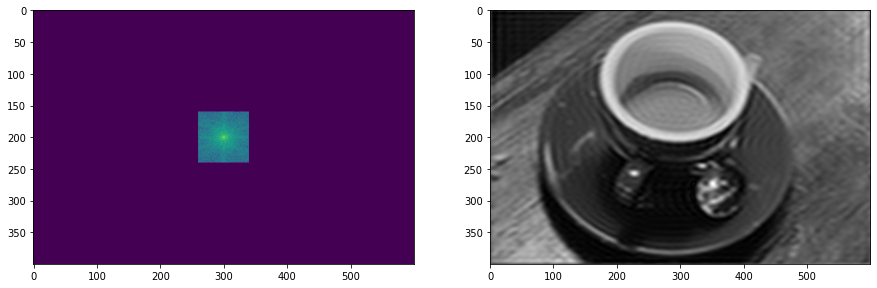

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = np.zeros(zero_center_im_fft.shape,dtype=np.complex)

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] =\
    zero_center_im_fft[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls]

plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

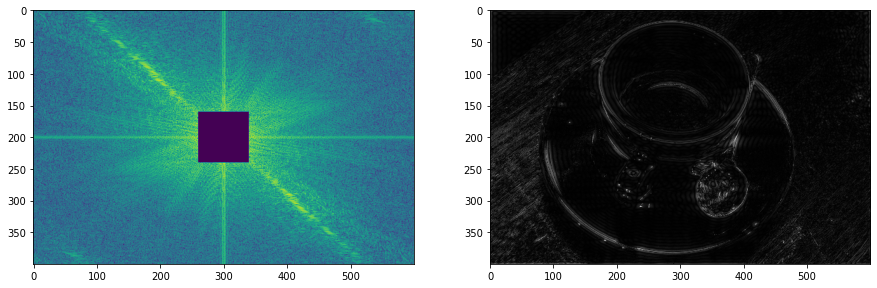

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = zero_center_im_fft

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] = 0+0.j
plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

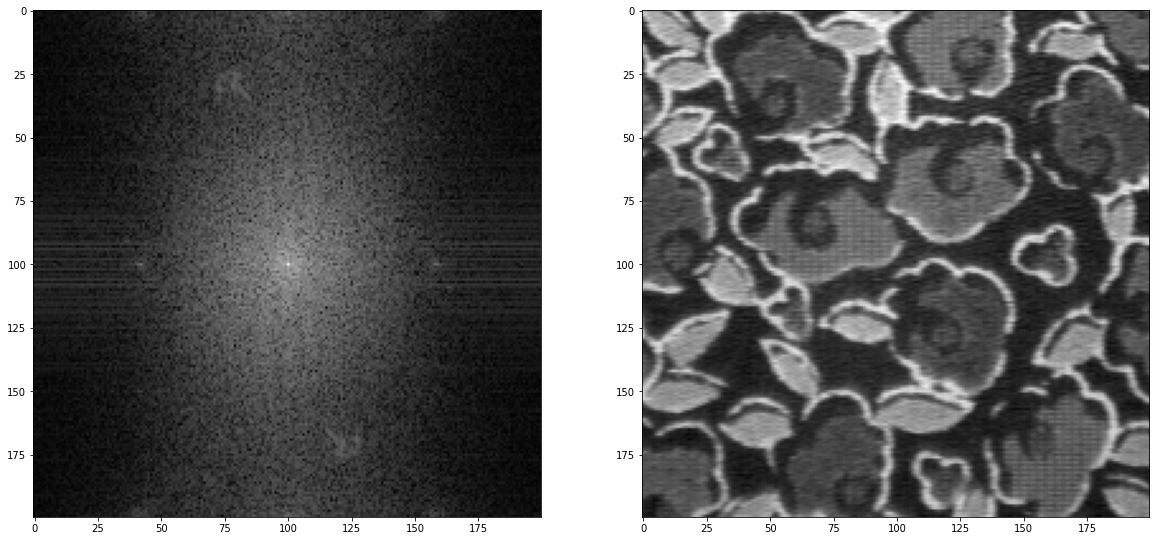

In [9]:
im = rgb2gray(io.imread('fabric.png'))
im = im[140:340,220:420]
plt.figure(figsize=(20,15))
plt.subplot(121)
im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)),cmap='gray')
plt.subplot(122)
plt.imshow(im,cmap='gray')

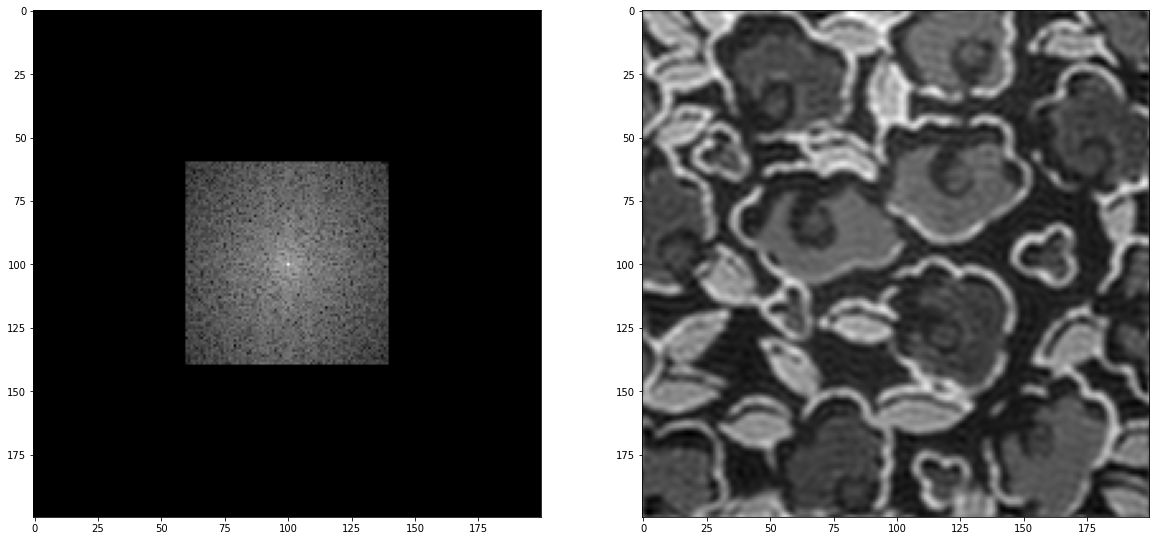

In [10]:
plt.figure(figsize=(20,15))
im_fft = fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)

cut_zero_center_im_fft = np.zeros(im.shape, dtype=np.complex)

center = (100,100)
pixels = 40

cut_zero_center_im_fft[center[0] - pixels:center[0] + pixels, center[1] - pixels:center[1] + pixels] = \
    zero_center_im_fft[center[0] - pixels:center[0] + pixels, center[1] - pixels:center[1] + pixels]
plt.subplot(121)
plt.imshow(np.log(1+np.abs(cut_zero_center_im_fft)),cmap='gray')
plt.subplot(122)
inverse_image = fft.ifft2(cut_zero_center_im_fft)
plt.imshow(np.abs(inverse_image), cmap = 'gray')

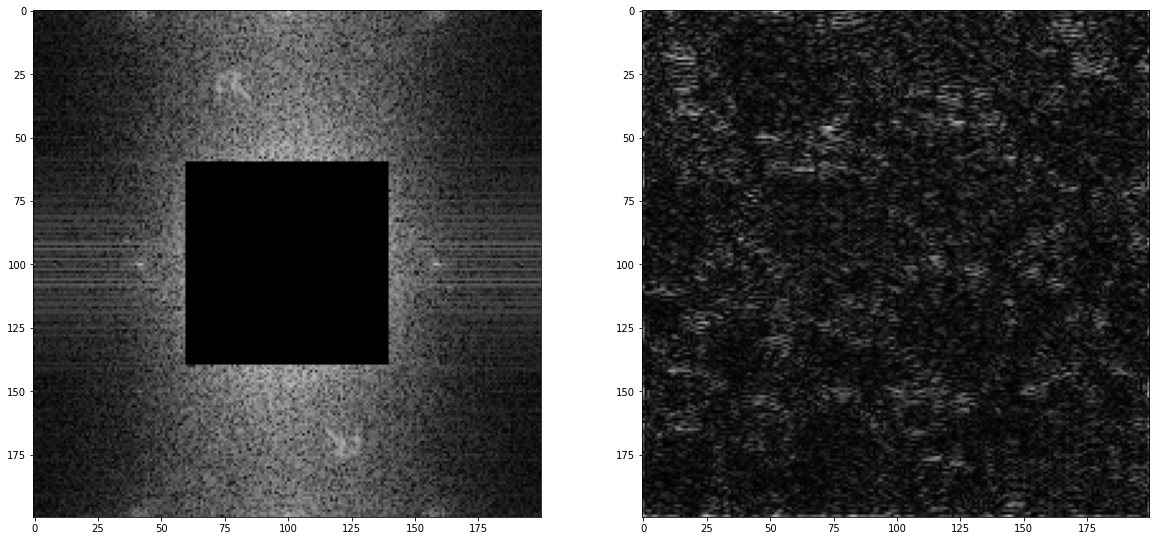

In [11]:
plt.figure(figsize=(20,15))
im_fft = fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)

cut_zero_center_im_fft = zero_center_im_fft

center = (100,100)
pixels = 40

cut_zero_center_im_fft[center[0] - pixels:center[0] + pixels, center[1] - pixels:center[1] + pixels] = 0
plt.subplot(121)
plt.imshow(np.log(1+np.abs(cut_zero_center_im_fft)),cmap = 'gray')
plt.subplot(122)
inverse_image = fft.ifft2(cut_zero_center_im_fft)
plt.imshow(np.abs(inverse_image), cmap = 'gray')


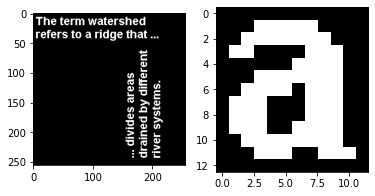

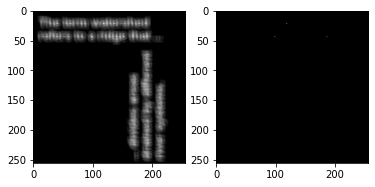

In [12]:
im = io.imread('text.png')

kernel = transform.rotate(im[32:45, 87:99], 180)
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
plt.imshow(transform.rotate(kernel,180),cmap='gray')
C = np.real(fft.ifft2(fft.fft2(im) * fft.fft2(kernel, im.shape)))
C += np.abs(np.min(C))
scale = 255/np.max(C)
C *= scale
plt.figure()
plt.subplot(121)
plt.imshow(C, cmap = 'gray')

plt.subplot(122)
plt.imshow(C>230, cmap='gray')

<ipython-input-13-205252214a57>:33: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(F3)),cmap="gray")


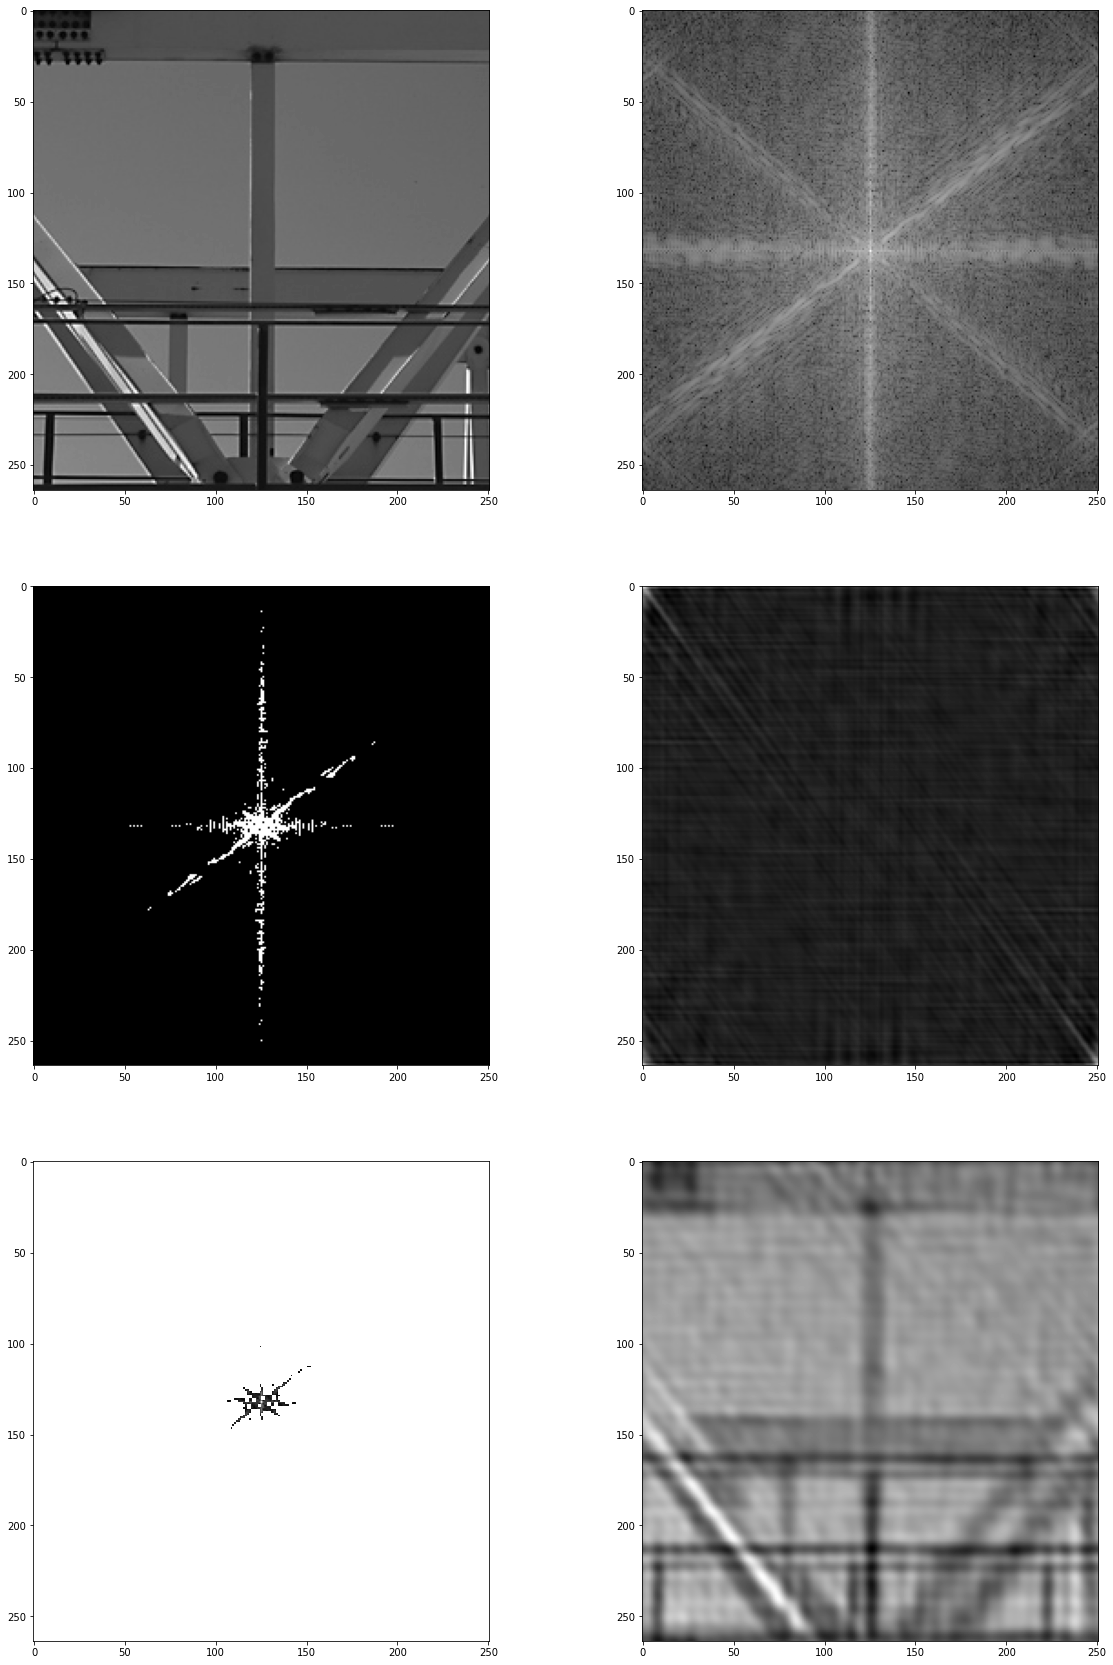

In [13]:
im = rgb2gray(io.imread('gantrycrane.png'))
im = im[:,69:320]
fft_im = fft.fft2(im)
centered_fft_im = fft.fftshift(fft_im)

plt.figure(figsize=(20,30))
plt.subplot(321)
plt.imshow(im, cmap = 'gray')
plt.subplot(322)
plt.imshow(np.log(np.abs(centered_fft_im)), cmap='gray')

plt.subplot(323)
tresh = np.log(np.abs(centered_fft_im)) > (0.45 * np.max(np.log(np.abs(centered_fft_im))))
plt.imshow(tresh, cmap='gray')
plt.subplot(324)
plt.imshow(np.real(fft.ifft2(fft.ifftshift(tresh))),cmap='gray')


circ_filter = np.zeros(np.shape(fft_im))
radius = 30
s1 = np.size(circ_filter[0])
s2 = np.size(circ_filter[1])

for i in range(s1):
    for j in range(s2):
        if np.sqrt(np.sum([np.power(i - s1/2, 2), np.power(j -s2/2, 2)])) < radius:
            circ_filter[i][j] = 1

F3 = centered_fft_im * tresh * circ_filter

im_finished = fft.ifft2(fft.ifftshift(F3))
plt.subplot(325)
plt.imshow(np.log(np.abs(F3)),cmap="gray")
plt.subplot(326)
plt.imshow(np.real(im_finished), cmap='gray')

<ipython-input-14-e4027e0313ad>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im = rgb2gray(io.imread('screen.png'))


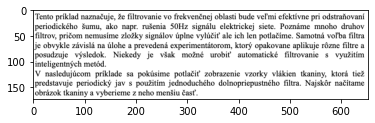

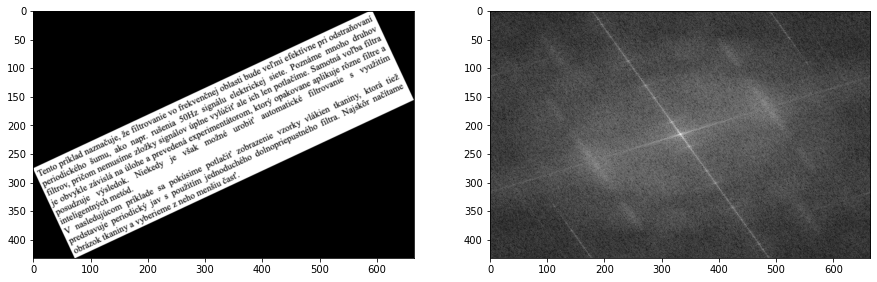

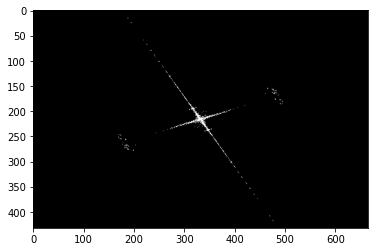

In [14]:
im = rgb2gray(io.imread('screen.png'))
plt.figure()
plt.imshow(im,cmap='gray')
im_rot = transform.rotate(im,25,resize=True)


fft_im = fft.fft2(im)
centered_fft_im = fft.fftshift(fft_im)

fft_im_rot = fft.fft2(im_rot)
centered_fft_im_rot = fft.fftshift(fft_im_rot)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im_rot,cmap='gray')

plt.subplot(122)
plt.imshow(np.log(1+np.abs(centered_fft_im_rot)), cmap='gray')

plt.figure()
tresh = np.log(np.abs(centered_fft_im_rot)) > (0.55 * np.max(np.log(np.abs(centered_fft_im_rot))))
plt.imshow(np.log(1+np.abs(tresh)), cmap='gray')